# Table of Contents
* [Removing what seems like outliers to get a cleaner picture](#Removing-what-seems-like-outliers-to-get-a-cleaner-picture)
* [looking at all the data over time again](#looking-at-all-the-data-over-time-again)


In [1]:
import pandas as pd
%matplotlib inline
from pylab import rcParams

rcParams['figure.figsize'] = 10, 5
rcParams['font.size'] = 20
rcParams['figure.dpi'] = 100
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

pd.set_option("display.max_rows",15)
pd.set_option("display.max_columns",15)
dfs = []

for i in range(1, 8):
    dfs.append(pd.read_csv("../data/PM_estimation/SKOMOBO-dust" + str(i) +".csv", index_col=0, parse_dates=True))
    
all_data = pd.concat(dfs)

In [2]:
all_data = all_data.set_index(pd.DatetimeIndex(all_data.DT.values))[["EQM_ID", "variable", "value"]]

In [4]:
pm10s = all_data[all_data.variable == "PM10"]
pm2_5s = all_data[all_data.variable == "PM2.5"]

skomobo10 = pm10s[pm10s.EQM_ID == "SKOMOBO1"]
skomobo2_5 = pm2_5s[pm2_5s.EQM_ID == "SKOMOBO1"]
pm10dt = all_data[all_data.EQM_ID == "PM10DT"]
pm2_5dt = all_data[all_data.EQM_ID == "PM2.5DT"]

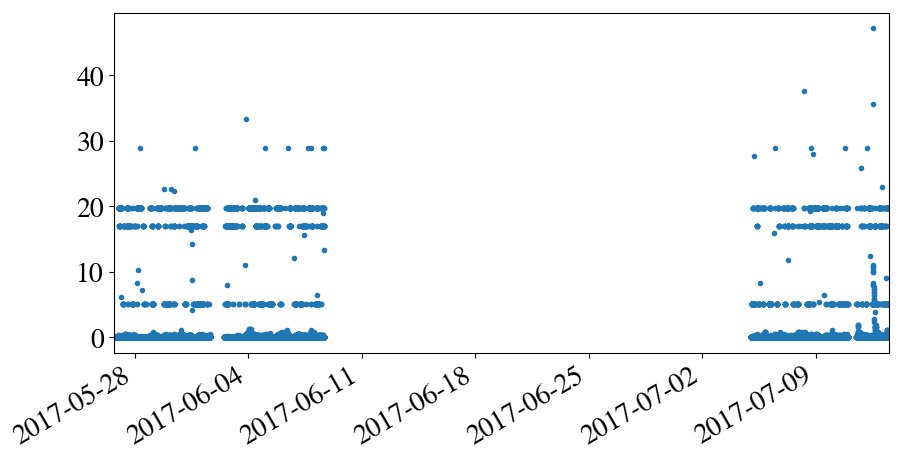

In [5]:
(skomobo10["value"]/float(1000)).plot(style='.')

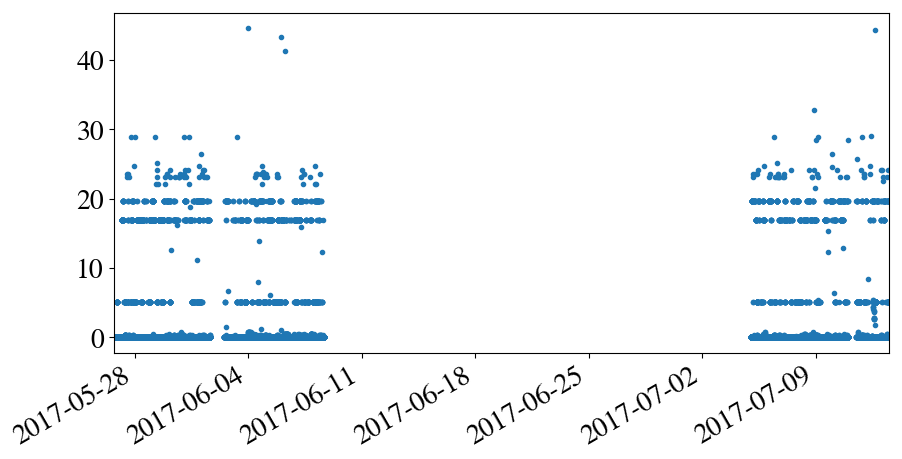

In [25]:
(skomobo2_5["value"]/float(1000)).plot(style='.')

In [32]:
comparison = pm10dt
comparison["skomobo1"] = (skomobo10.value / float(1000))

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [36]:
comparison = comparison.dropna()

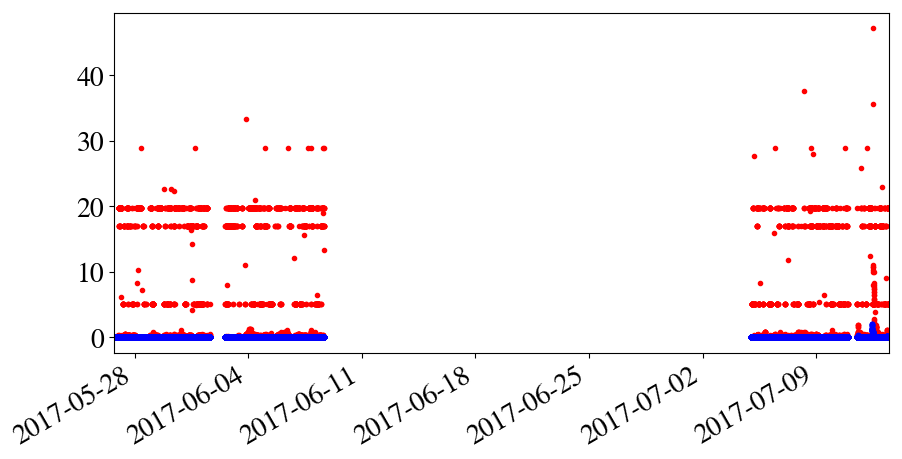

In [37]:
comparison.skomobo1.plot(style='.', c='r')
comparison.value.plot(style='.', c='b')

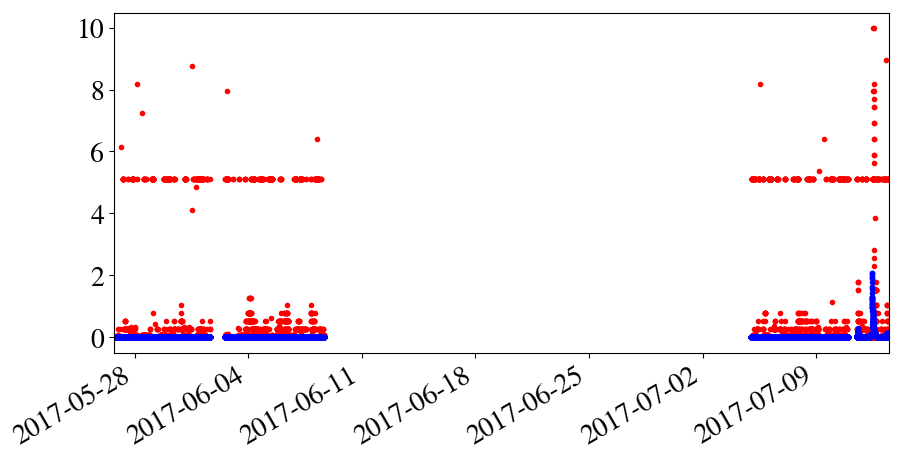

In [39]:
comparison.skomobo1[comparison.skomobo1<10].plot(style='.', c='r')
comparison.value.plot(style='.', c='b')

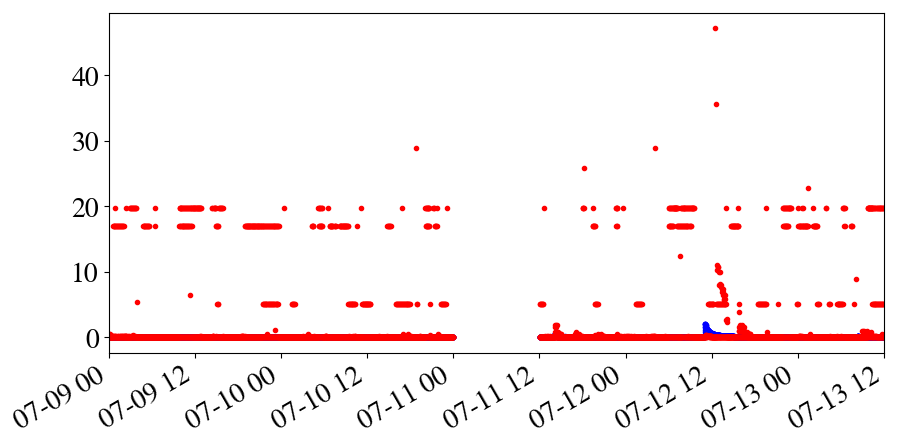

In [48]:
comparison["2017-07-09":].value.plot(style='.', c='b')
comparison["2017-07-09":].skomobo1.plot(style='.', c='r')

# Removing what seems like outliers to get a cleaner picture

In [52]:
clean_comparison = comparison[comparison.skomobo1 < 4]

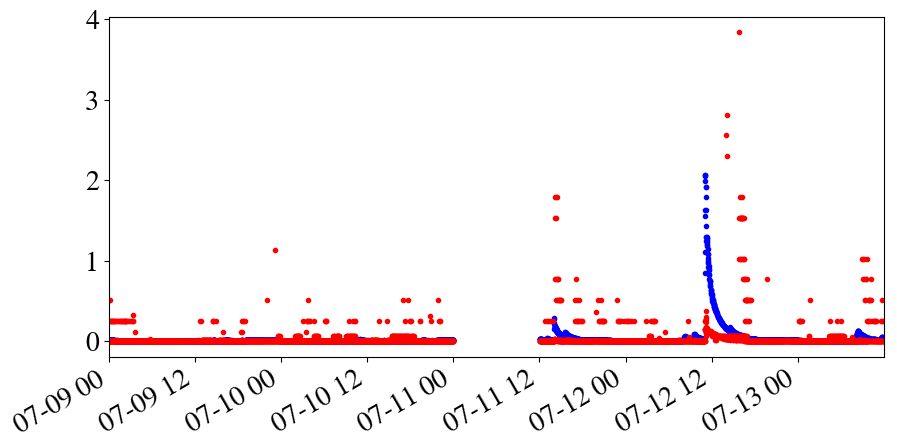

In [53]:
clean_comparison["2017-07-09":].value.plot(style='.', c='b')
clean_comparison["2017-07-09":].skomobo1.plot(style='.', c='r')

# looking at all the data over time again

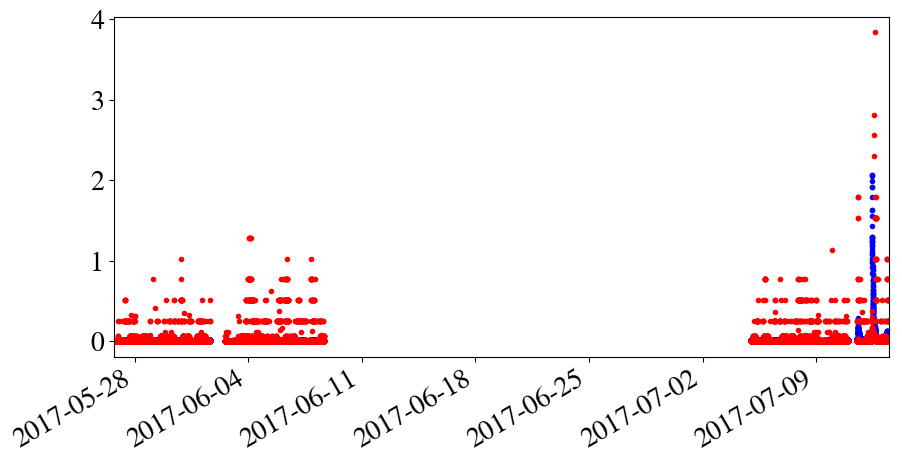

In [54]:
clean_comparison.value.plot(style='.', c='b')
clean_comparison.skomobo1.plot(style='.', c='r')

In [55]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [64]:
model = LinearRegression().fit(clean_comparison.skomobo1.values.reshape(-1,1), clean_comparison.value.values.reshape(-1,1))

In [73]:
# training accuracy

In [65]:
model.score(clean_comparison.skomobo1.values.reshape(-1,1), clean_comparison.value.values.reshape(-1,1))

0.0093062003647503833

In [74]:
# testing accuracy

In [72]:
model.score(comparison.skomobo1.values.reshape(-1,1), comparison.value.values.reshape(-1,1))

-29.759740490360642

In [68]:
clean_comparison["prediction"] = model.predict(clean_comparison.skomobo1.values.reshape(-1,1))

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


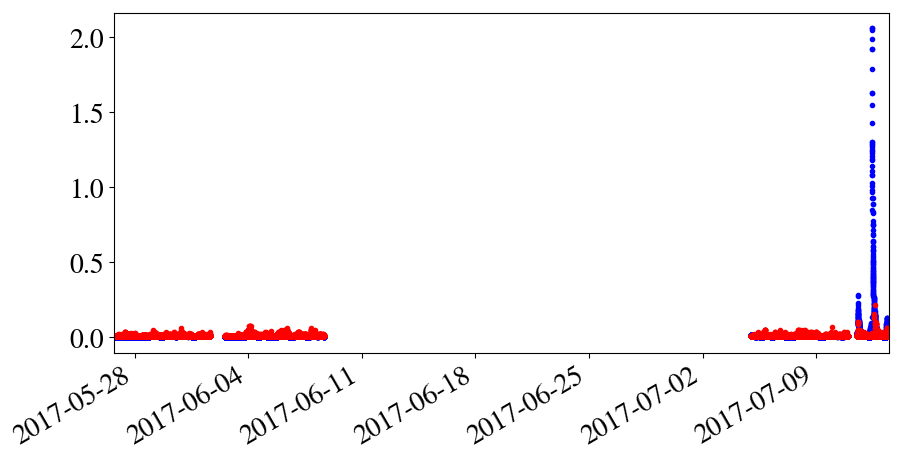

In [69]:
clean_comparison.value.plot(style='.', c='b')
clean_comparison.prediction.plot(style='.', c='r')

In [77]:
from sklearn.naive_bayes import MultinomialNB

In [80]:
model = MultinomialNB().fit(clean_comparison.skomobo1.values.reshape(-1,1), clean_comparison.value.values.reshape(-1,1))

ValueError: Unknown label type: (array([ 0.008,  0.008,  0.01 , ...,  0.04 ,  0.038,  0.039]),)

In [73]:
# training accuracy

In [65]:
model.score(clean_comparison.skomobo1.values.reshape(-1,1), clean_comparison.value.values.reshape(-1,1))

0.0093062003647503833

In [74]:
# testing accuracy

In [72]:
model.score(comparison.skomobo1.values.reshape(-1,1), comparison.value.values.reshape(-1,1))

-29.759740490360642

In [68]:
clean_comparison["prediction"] = model.predict(clean_comparison.skomobo1.values.reshape(-1,1))

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


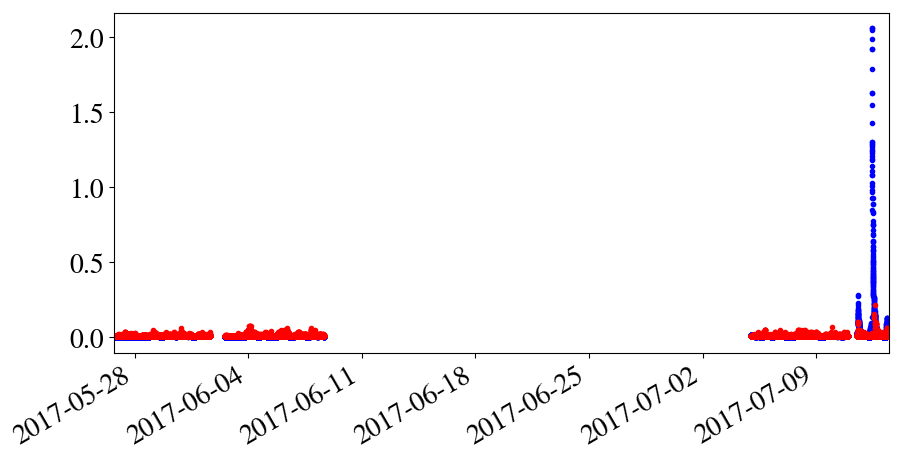

In [69]:
clean_comparison.value.plot(style='.', c='b')
clean_comparison.prediction.plot(style='.', c='r')

In [81]:
from pandas.tools.plotting import autocorrelation_plot

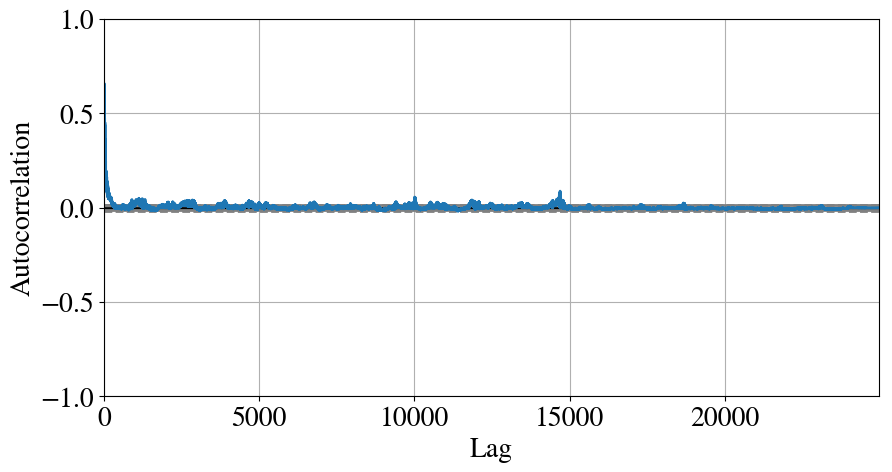

In [84]:
autocorrelation_plot(clean_comparison[["value", "skomobo1"]])

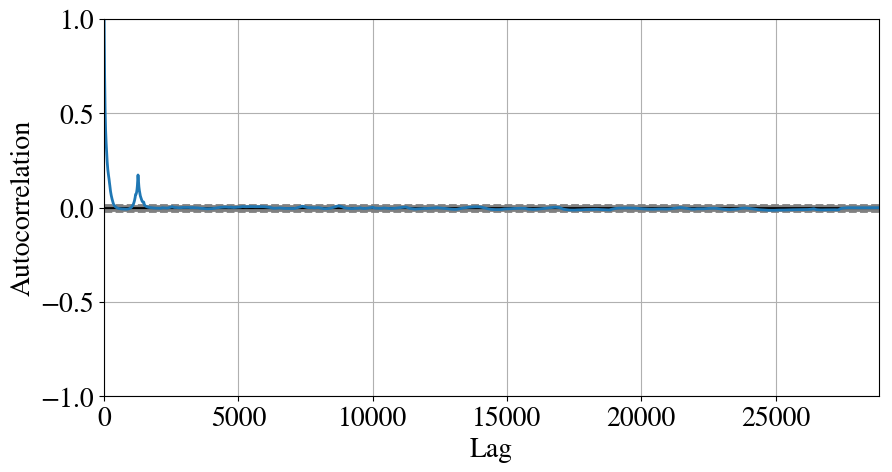

In [86]:
autocorrelation_plot(comparison[["value"]])

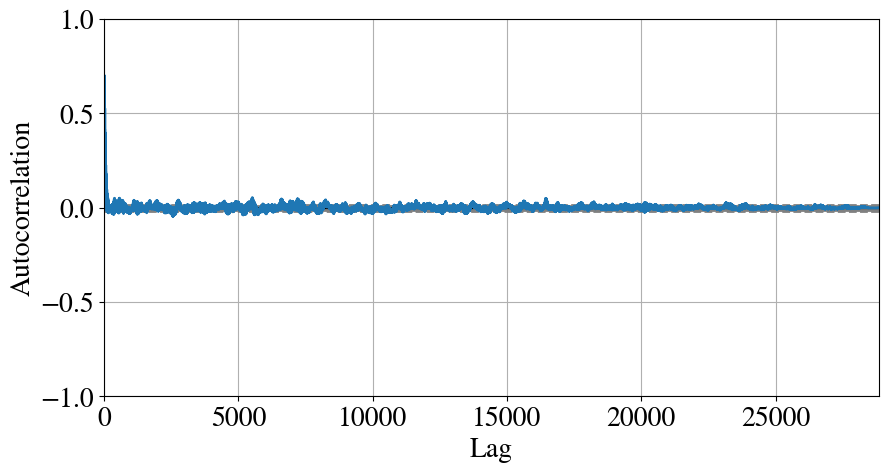

In [87]:
autocorrelation_plot(comparison[["skomobo1"]])

In [91]:
# seems like there is a small degree non randomisation in the skomobo data

In [94]:
from statsmodels.tsa.arima_model import ARIMA

arima model tutorial available here https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [119]:
model = ARIMA(comparison.value, order=(5,1,0))

In [120]:
model_fit = model.fit(disp=0)

In [121]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                28855
Model:                 ARIMA(5, 1, 0)   Log Likelihood              112404.850
Method:                       css-mle   S.D. of innovations              0.005
Date:                Wed, 25 Oct 2017   AIC                        -224795.699
Time:                        12:44:53   BIC                        -224737.809
Sample:                    05-26-2017   HQIC                       -224777.090
                         - 07-13-2017                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          9.352e-07   7.62e-05      0.012      0.990        -0.000     0.000
ar.L1.D.value     0.4268      0.006     72.874      0.000         0.415     0.438
ar.L2.D.value     0.3781      0.006     

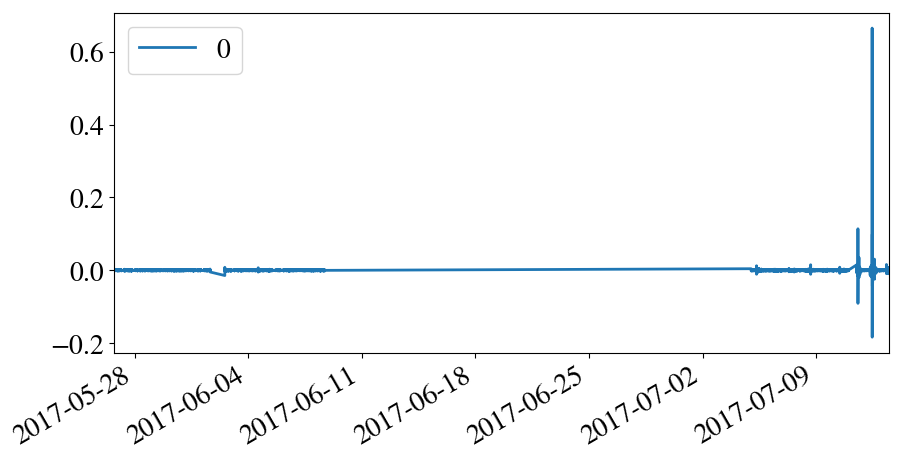

In [122]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

                  0
count  2.885500e+04
mean  -2.832109e-08
std    4.920024e-03
min   -1.835749e-01
25%   -3.553175e-07
50%   -3.553175e-07
75%   -3.553175e-07
max    6.647951e-01


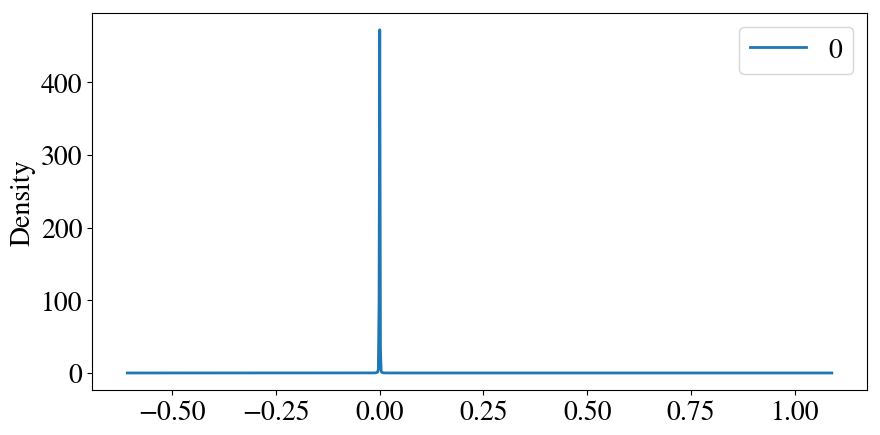

In [123]:
residuals.plot(kind='kde')
print(residuals.describe())

In [132]:
predictions = pd.DataFrame(model_fit.predict(), columns=["value"])

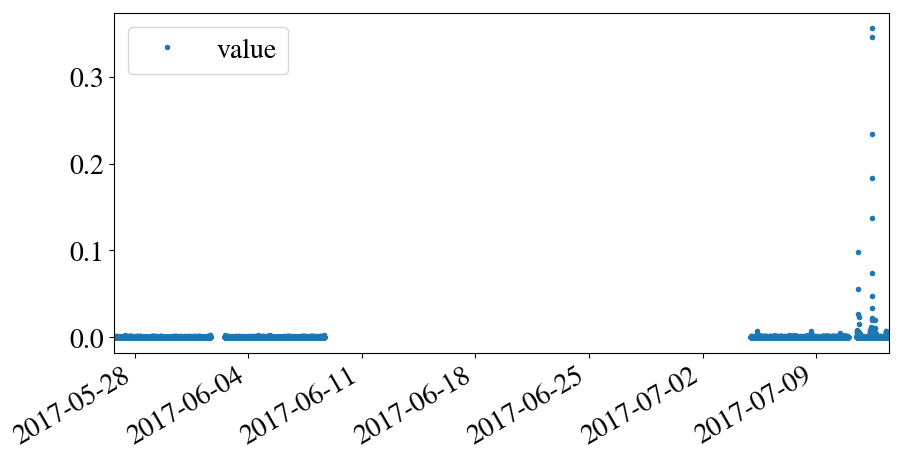

In [135]:
predictions[predictions.value>0].plot(style = '.')

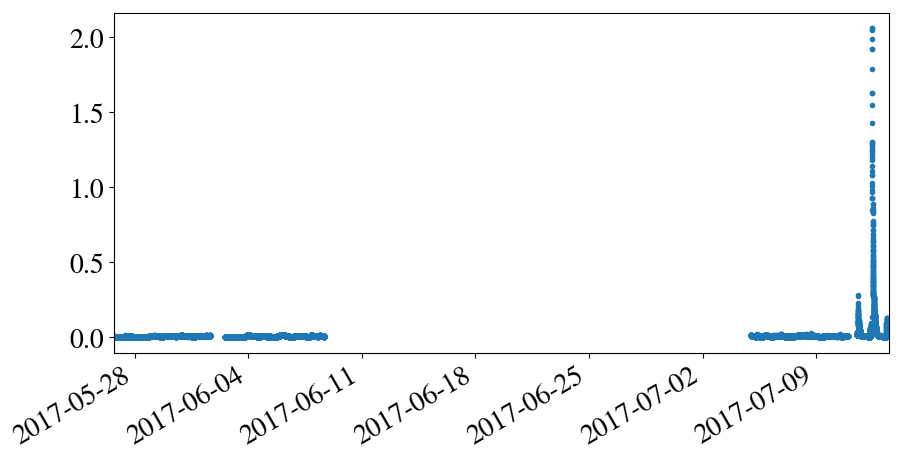

In [136]:
comparison.value.plot(style='.')

In [137]:
model = ARIMA(comparison.value, order=(3,1,0))

In [138]:
model_fit = model.fit(disp=0)

In [139]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                28855
Model:                 ARIMA(3, 1, 0)   Log Likelihood              112089.667
Method:                       css-mle   S.D. of innovations              0.005
Date:                Wed, 25 Oct 2017   AIC                        -224169.334
Time:                        13:02:43   BIC                        -224127.984
Sample:                    05-26-2017   HQIC                       -224156.042
                         - 07-13-2017                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          9.427e-07   7.57e-05      0.012      0.990        -0.000     0.000
ar.L1.D.value     0.3910      0.006     68.283      0.000         0.380     0.402
ar.L2.D.value     0.4547      0.006     

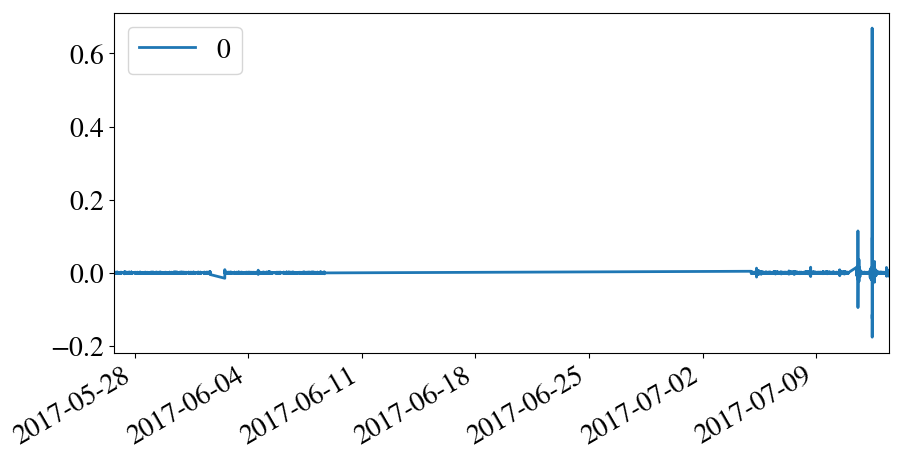

In [140]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

                  0
count  2.885500e+04
mean  -2.340008e-08
std    4.974067e-03
min   -1.762764e-01
25%   -3.646274e-07
50%   -3.646274e-07
75%   -3.646274e-07
max    6.692169e-01


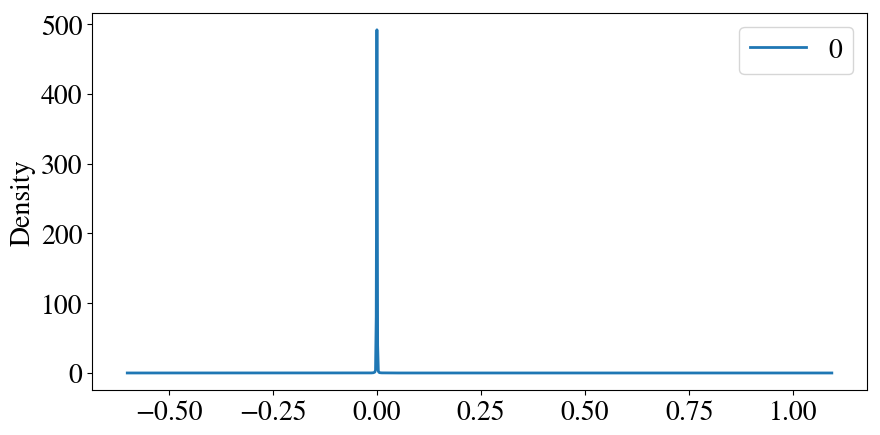

In [141]:
residuals.plot(kind='kde')
print(residuals.describe())

In [142]:
predictions = pd.DataFrame(model_fit.predict(), columns=["value"])

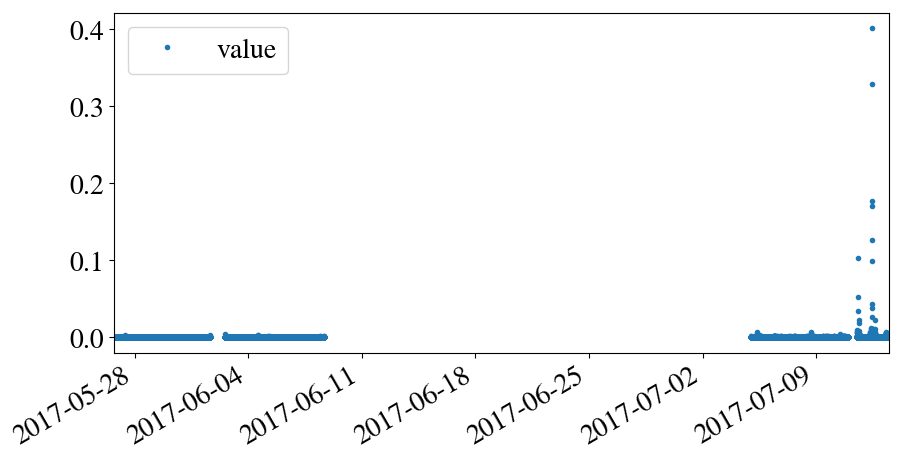

In [143]:
predictions[predictions.value>0].plot(style = '.')

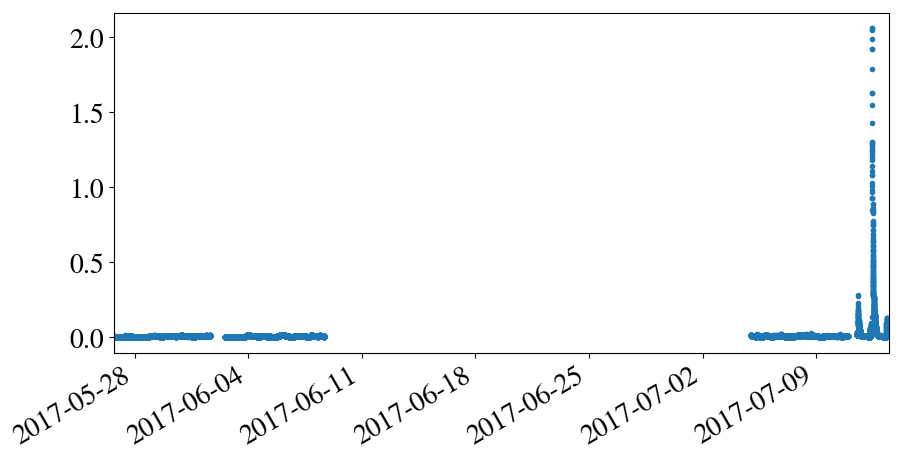

In [144]:
comparison.value.plot(style='.')

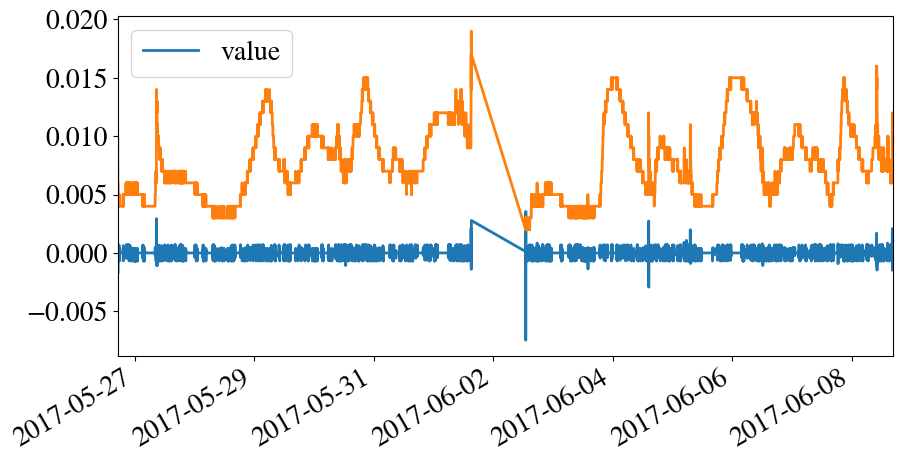

In [146]:
predictions[:"2017-06-11"].plot()
comparison[:"2017-06-11"].value.plot()

On closer inspection it seems like the arima model is actually struggling to capture the changes over time, maybe this is due to the values being far to random?

Lets try kneighbours because the problem with linear regression is that it still doesnt generalise well at all

In [147]:
from sklearn.neighbors import KNeighborsRegressor

In [149]:
model = KNeighborsRegressor().fit(clean_comparison.skomobo1.values.reshape(-1,1), clean_comparison.value.values.reshape(-1,1))

In [150]:
model.score(clean_comparison.skomobo1.values.reshape(-1,1), clean_comparison.value.values.reshape(-1,1))

0.65727236620243157

In [151]:
model.score(comparison.skomobo1.values.reshape(-1,1), comparison.value.values.reshape(-1,1))

0.11377926924066516

In [152]:
clean_comparison["neighbour_predict"] = model.predict(clean_comparison.skomobo1.values.reshape(-1,1))

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


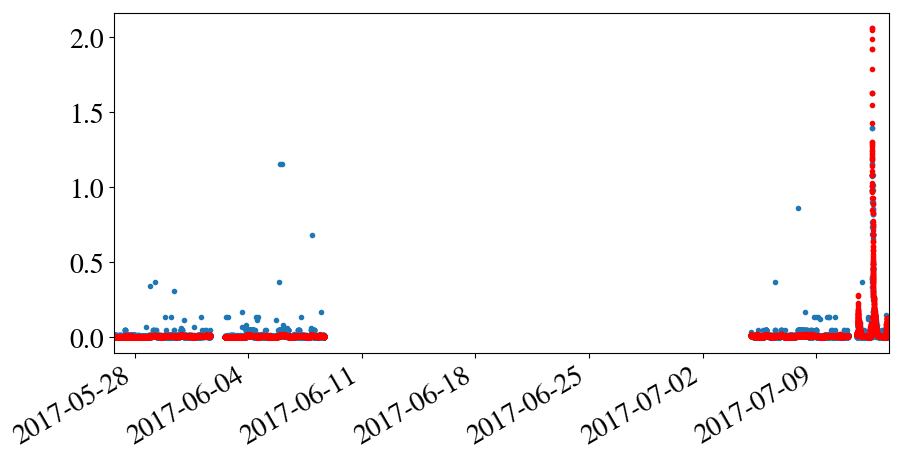

In [153]:
clean_comparison["neighbour_predict"].plot(style='.')
clean_comparison["value"].plot(style='.', c='r')

In [155]:
from sklearn.ensemble import BaggingRegressor

In [167]:
model = BaggingRegressor().fit(clean_comparison.skomobo1.values.reshape(-1,1), clean_comparison.value.values.reshape(-1,1))

In [168]:
model.score(clean_comparison.skomobo1.values.reshape(-1,1), clean_comparison.value.values.reshape(-1,1))

0.8061089577169942

In [169]:
model.score(comparison.skomobo1.values.reshape(-1,1), comparison.value.values.reshape(-1,1))

0.3952552145104643

In [170]:
clean_comparison["bag_predict"] = model.predict(clean_comparison.skomobo1.values.reshape(-1,1))

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


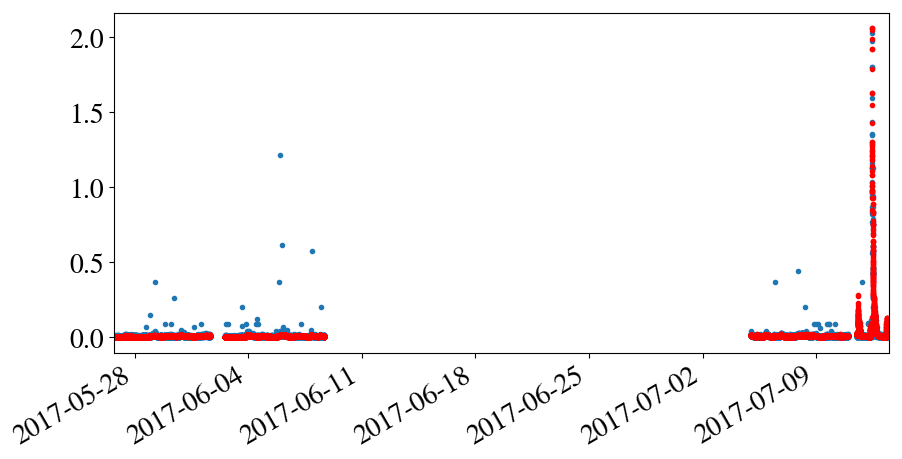

In [171]:
clean_comparison["bag_predict"].plot(style='.')
clean_comparison["value"].plot(style='.', c='r')

In [172]:
# using more data

In [176]:
model = BaggingRegressor().fit(comparison.skomobo1.values.reshape(-1,1), comparison.value.values.reshape(-1,1))

In [177]:
model.score(clean_comparison.skomobo1.values.reshape(-1,1), clean_comparison.value.values.reshape(-1,1))

0.79898973776069493

In [178]:
model.score(comparison.skomobo1.values.reshape(-1,1), comparison.value.values.reshape(-1,1))

0.7397212123511917

In [179]:
clean_comparison["bag_predict"] = model.predict(clean_comparison.skomobo1.values.reshape(-1,1))

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


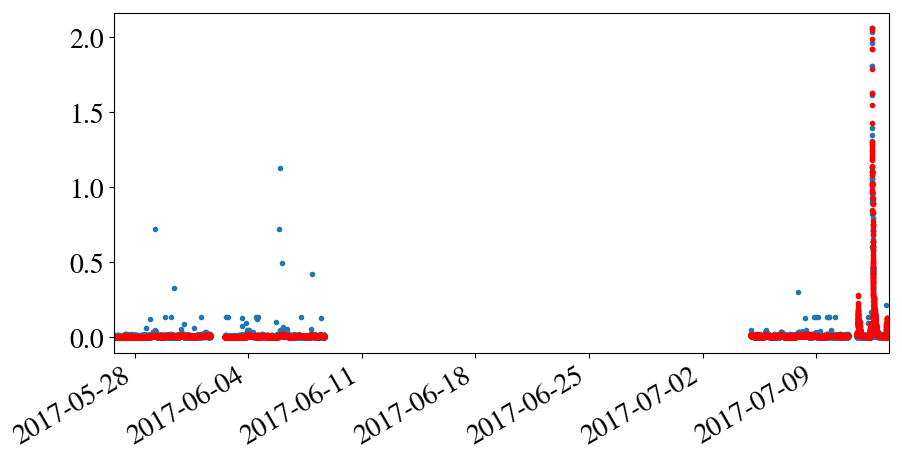

In [180]:
clean_comparison["bag_predict"].plot(style='.')
clean_comparison["value"].plot(style='.', c='r')

In [ ]:
# train it using all the boxes and specify that the box id is categorical

In [6]:
no_pm10dt = all_data[all_data["EQM_ID"] != "PM10DT"]
no_pm2_5dt = no_pm10dt[no_pm10dt["EQM_ID"] != "PM2.5DT"]
no_dtm10 = no_pm2_5dt[no_pm2_5dt["EQM_ID"] != "DTPM10"]
skomobos = no_dtm10[no_dtm10["EQM_ID"] != "DTPM2.5"]

In [193]:
pm10_comp = all_data[all_data["EQM_ID"] == "PM10DT"]

In [203]:
pm10_comp.shape

(33579, 3)

In [198]:
skomobo_categories = pd.get_dummies(skomobos.EQM_ID)
skomobo_categories["value"] = skomobos.value

In [201]:
skomobos.shape

# find where these line up

(499981, 3)

In [202]:
skomobos

,EQM_ID,variable,value
2017-05-12 17:30:00,SKOMOBO,PM1.0,0.0
2017-05-12 17:31:00,SKOMOBO,PM1.0,0.0
2017-05-12 17:32:00,SKOMOBO,PM1.0,0.0
2017-05-12 17:33:00,SKOMOBO,PM1.0,0.0
2017-05-12 17:34:00,SKOMOBO,PM1.0,0.0
2017-05-12 17:35:00,SKOMOBO,PM1.0,0.0
2017-05-12 17:36:00,SKOMOBO,PM1.0,0.0
...,...,...,...
2017-07-13 11:54:00,SKOMOBO6,PM10,2.0
2017-07-13 11:55:00,SKOMOBO6,PM10,512.0


In [199]:
skomobo_categories

,SKOMOBO,SKOMOBO1,SKOMOBO2,SKOMOBO3,SKOMOBO4,SKOMOBO5,SKOMOBO6,SKOMOBO7,value
2017-05-12 17:30:00,1,0,0,0,0,0,0,0,0.0
2017-05-12 17:31:00,1,0,0,0,0,0,0,0,0.0
2017-05-12 17:32:00,1,0,0,0,0,0,0,0,0.0
2017-05-12 17:33:00,1,0,0,0,0,0,0,0,0.0
2017-05-12 17:34:00,1,0,0,0,0,0,0,0,0.0
2017-05-12 17:35:00,1,0,0,0,0,0,0,0,0.0
2017-05-12 17:36:00,1,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
2017-07-13 11:54:00,0,0,0,0,0,0,1,0,2.0
2017-07-13 11:55:00,0,0,0,0,0,0,1,0,512.0


In [176]:
model = BaggingRegressor().fit(pm10_comp[], comparison.value.values.reshape(-1,1))

In [177]:
model.score(clean_comparison.skomobo1.values.reshape(-1,1), clean_comparison.value.values.reshape(-1,1))

0.79898973776069493

In [178]:
model.score(comparison.skomobo1.values.reshape(-1,1), comparison.value.values.reshape(-1,1))

0.7397212123511917

In [179]:
clean_comparison["bag_predict"] = model.predict(clean_comparison.skomobo1.values.reshape(-1,1))

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


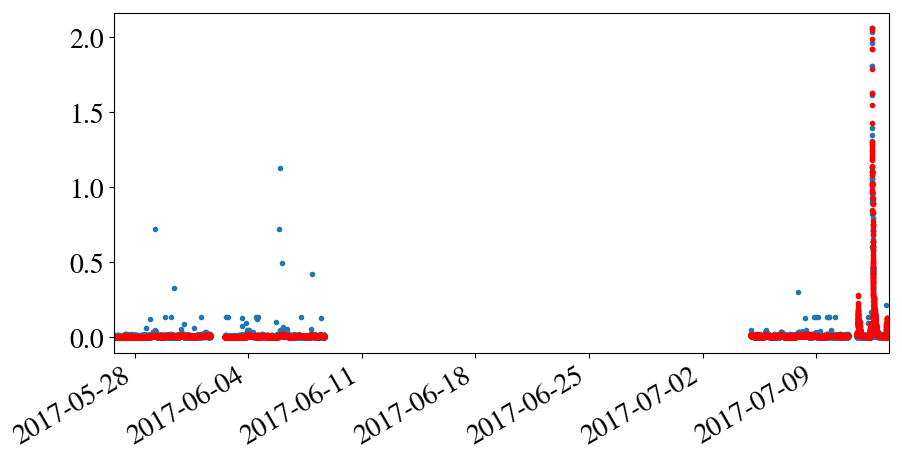

In [180]:
clean_comparison["bag_predict"].plot(style='.')
clean_comparison["value"].plot(style='.', c='r')

In [204]:
from sklearn.ensemble import GradientBoostingRegressor

In [210]:
model = GradientBoostingRegressor(random_state=123).fit(clean_comparison.skomobo1.values.reshape(-1,1), clean_comparison.value.values.reshape(-1,1))

In [211]:
model.score(clean_comparison.skomobo1.values.reshape(-1,1), clean_comparison.value.values.reshape(-1,1))

0.80519665649891725

In [212]:
model.score(comparison.skomobo1.values.reshape(-1,1), comparison.value.values.reshape(-1,1))

0.45360160841564329

In [213]:
clean_comparison["gradient_predict"] = model.predict(clean_comparison.skomobo1.values.reshape(-1,1))

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


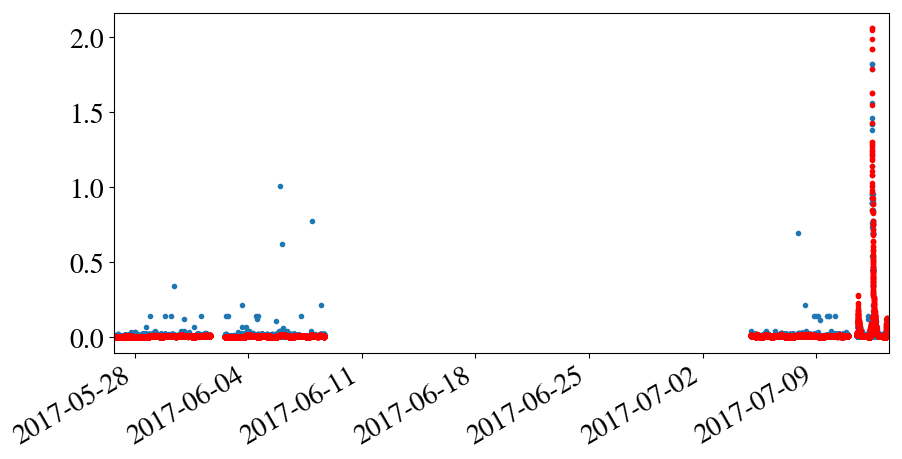

In [215]:
clean_comparison["gradient_predict"].plot(style='.')
clean_comparison["value"].plot(style='.', c='r')

Feature enginering go!!

In [220]:
clean_comparison["diff_skomobo1"] = clean_comparison.skomobo1 - clean_comparison.shift(-1).skomobo1
clean_comparison = clean_comparison.fillna(0)

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [221]:
comparison["diff_skomobo1"] = comparison.skomobo1 - comparison.shift(-1).skomobo1
comparison = comparison.fillna(0)

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


training accuracy 0.90132879532
testing accuracy 0.447024859798


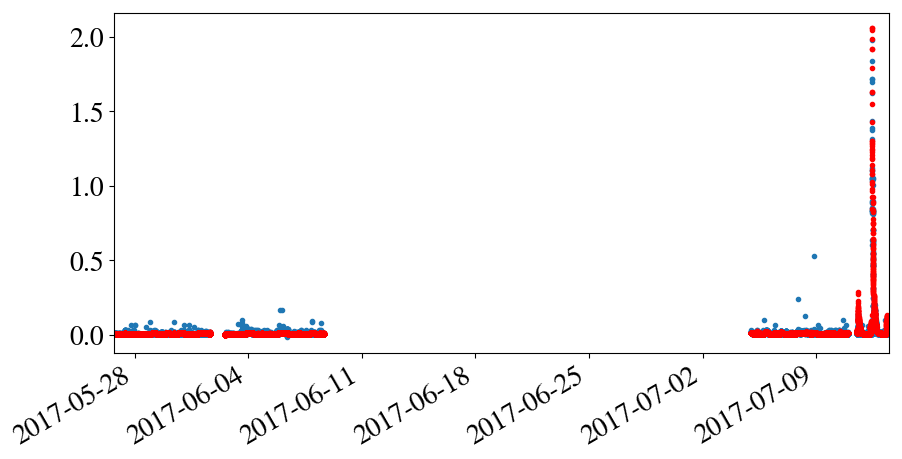

In [236]:
model = GradientBoostingRegressor(random_state=123).fit(clean_comparison[["skomobo1", "diff_skomobo1"]], clean_comparison.value.values.reshape(-1,1))
print "training accuracy " + str(model.score(clean_comparison[["skomobo1", "diff_skomobo1"]], clean_comparison.value.values.reshape(-1,1)))
print "testing accuracy " + str(model.score(comparison[["skomobo1", "diff_skomobo1"]], comparison.value.values.reshape(-1,1)))
print "testing all data"
clean_comparison["gradient_predict"] = model.predict(clean_comparison[["skomobo1", "diff_skomobo1"]])
clean_comparison["gradient_predict"].plot(style='.')
clean_comparison["value"].plot(style='.', c='r')

In [237]:
# add binary feature and  area under the curve?
comparison["isIncreasing"] = comparison["diff_skomobo1"] > 0
clean_comparison["isIncreasing"] = clean_comparison["diff_skomobo1"] > 0

training accuracy 0.90132879532
testing accuracy 0.446580379821


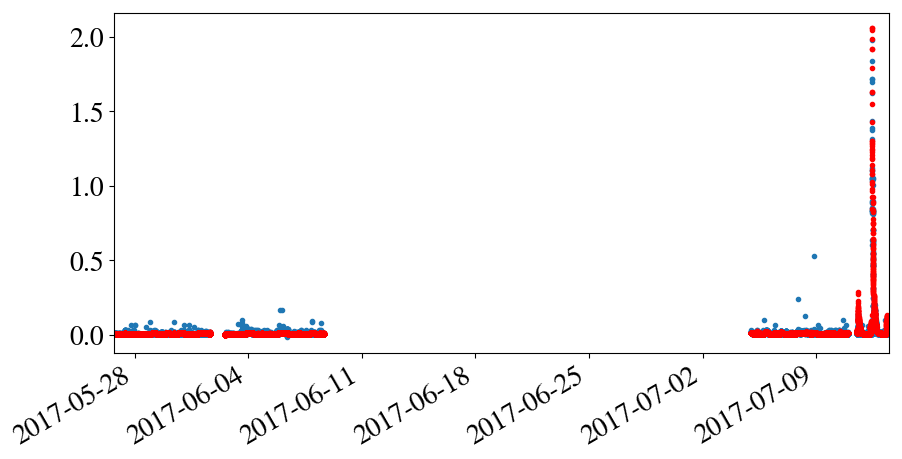

In [239]:
cols = ["skomobo1", "diff_skomobo1", "isIncreasing"]
model = GradientBoostingRegressor(random_state=123).fit(clean_comparison[cols], clean_comparison.value.values.reshape(-1,1))
print "training accuracy " + str(model.score(clean_comparison[cols], clean_comparison.value.values.reshape(-1,1)))
print "testing accuracy " + str(model.score(comparison[cols], comparison.value.values.reshape(-1,1)))
clean_comparison["gradient_predict"] = model.predict(clean_comparison[cols])
_ = clean_comparison["gradient_predict"].plot(style='.')
_ =clean_comparison["value"].plot(style='.', c='r')

In [ ]:
# accuracy is decreasing with increase in dimensionality

In [7]:
skomobos_pm10 = skomobos[skomobos["variable"] == "PM10"]

In [8]:
skomobos_pm10["value"] = skomobos_pm10["value"]/float(1000)

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


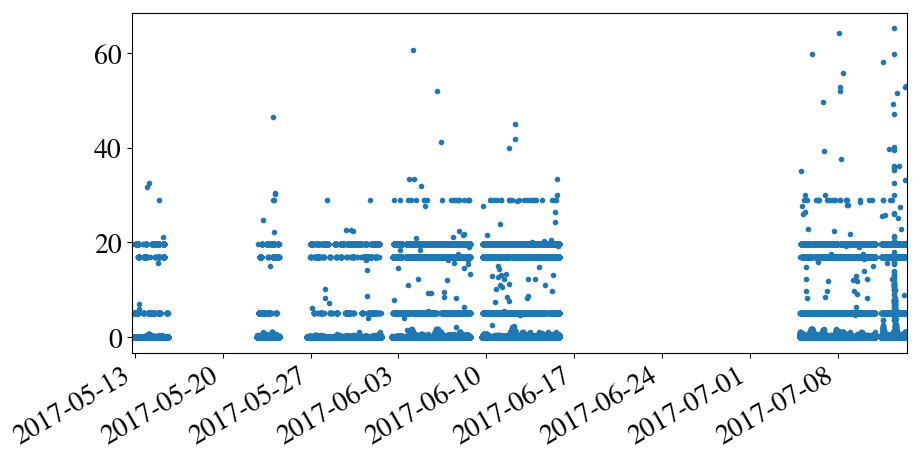

In [248]:
skomobos_pm10.value.plot(style='.')

In [9]:
final_comparison = skomobos_pm10.join(pm10dt, how='left', rsuffix="_dustrack")[["EQM_ID", "value", "value_dustrack"]]

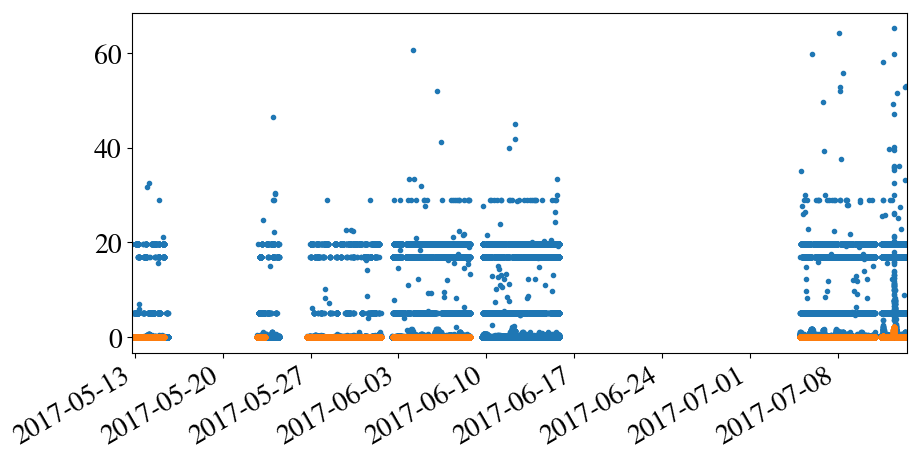

In [10]:
final_comparison["value"].plot(style='.')
final_comparison["value_dustrack"].plot(style='.')

In [11]:
cleaned_final_comparison = final_comparison[final_comparison["value"] < 2.2].dropna()

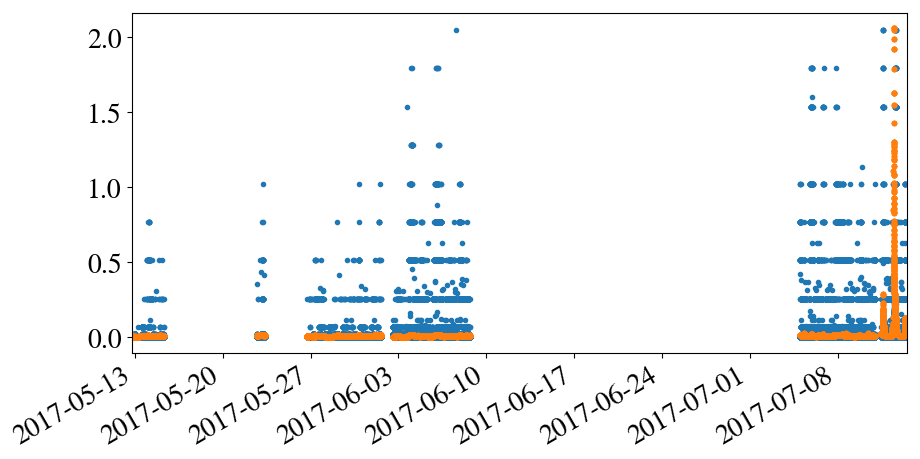

In [12]:
cleaned_final_comparison["value"].plot(style='.')
cleaned_final_comparison["value_dustrack"].plot(style='.')

In [267]:
cleaned_final_comparison.shape

(117267, 3)

In [273]:
cleaned_final_comparison["diff1"] = cleaned_final_comparison.value - cleaned_final_comparison.shift(-1).value
cleaned_final_comparison = cleaned_final_comparison.fillna(0)
final_comparison["diff1"] = final_comparison.value - final_comparison.shift(-1).value
final_comparison = final_comparison.fillna(0)

In [285]:
def get_box_id(label):
    if (label[7:] != ''):
        return int(label[7:])
    else:
        return 0

In [288]:
cleaned_final_comparison["Box_ID"] = [get_box_id(ID) for ID in cleaned_final_comparison.EQM_ID]
final_comparison["Box_ID"] = [get_box_id(ID) for ID in final_comparison.EQM_ID]

training accuracy 0.788466016698
testing accuracy 0.46151153094


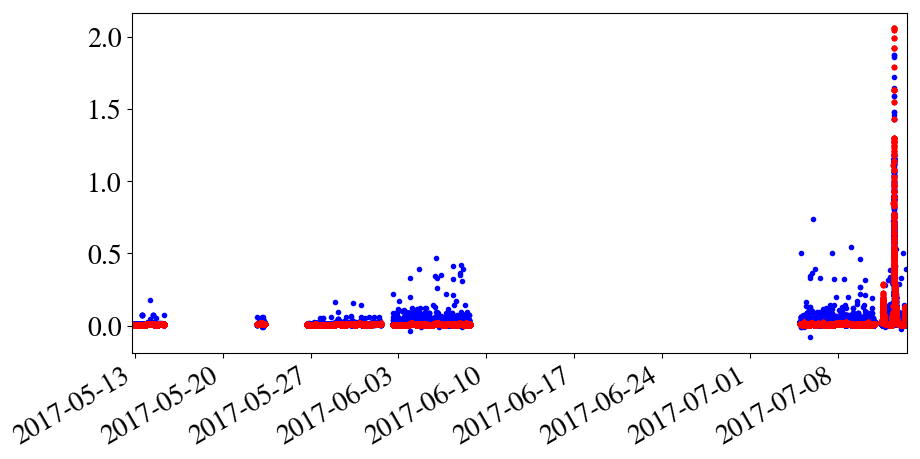

In [334]:
cols = ["value", "diff1"]
model = GradientBoostingRegressor(random_state=123).fit(cleaned_final_comparison[cols], cleaned_final_comparison.value_dustrack.values.reshape(-1,1))
print "training accuracy " + str(model.score(cleaned_final_comparison[cols], cleaned_final_comparison.value_dustrack.values.reshape(-1,1)))
print "testing accuracy " + str(model.score(final_comparison[cols], final_comparison.value_dustrack.values.reshape(-1,1)))
cleaned_final_comparison["gradient_predict"] = model.predict(cleaned_final_comparison[cols])
cleaned_final_comparison["gradient_predict"].plot(style='.', c='b')
cleaned_final_comparison["value_dustrack"].plot(style='.', c='r')

training accuracy 0.529378059414


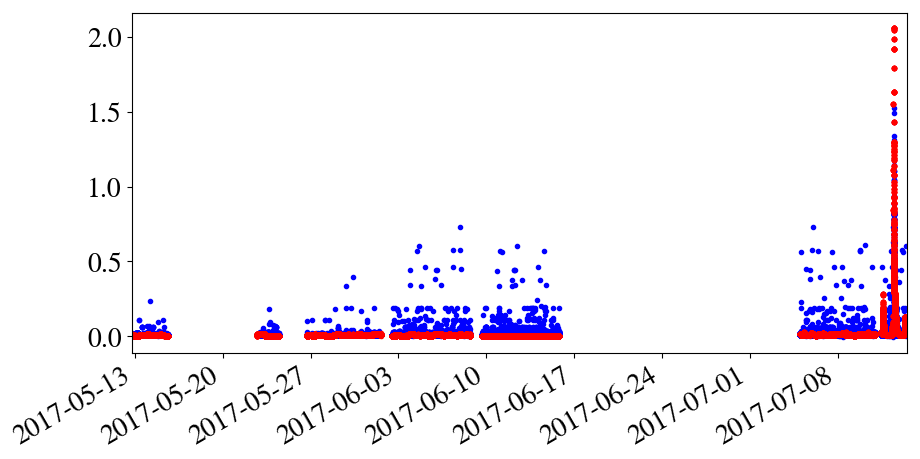

In [335]:
cols = ["value", "diff1"]
model = GradientBoostingRegressor(random_state=123).fit(final_comparison[cols], final_comparison.value_dustrack.values.reshape(-1,1))
print "training accuracy " + str(model.score(final_comparison[cols], final_comparison.value_dustrack.values.reshape(-1,1)))
final_comparison["gradient_predict"] = model.predict(final_comparison[cols])
final_comparison["gradient_predict"].plot(style='.', c='b')
final_comparison["value_dustrack"].plot(style='.', c='r')

In [337]:
# train test split
from sklearn.model_selection import train_test_split

training accuracy 0.546243371369
testing accuracy 0.423542366809


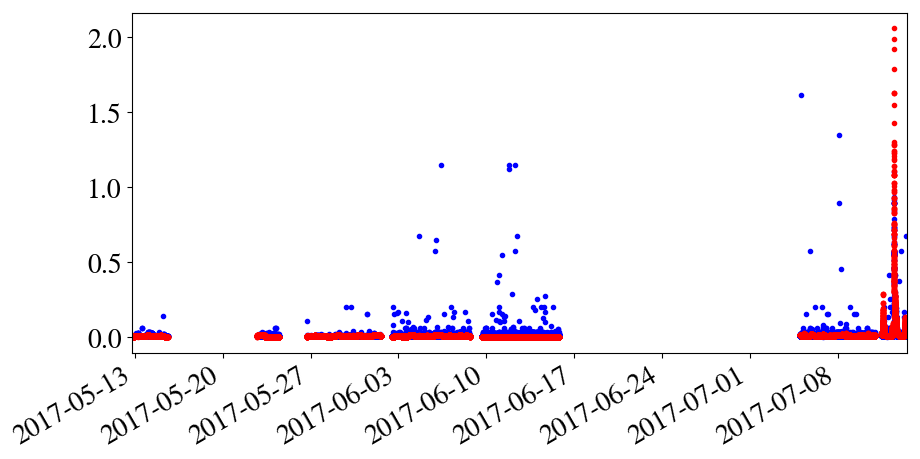

In [341]:
cols = ["value", "diff1"]

train, test = train_test_split(final_comparison[cols + ["value_dustrack"]])

model = GradientBoostingRegressor(random_state=123).fit(train[cols], train.value_dustrack.values.reshape(-1,1))
print "training accuracy " + str(model.score(train[cols], train.value_dustrack.values.reshape(-1,1)))
print "testing accuracy " + str(model.score(test[cols],test.value_dustrack.values.reshape(-1,1)))                                                
test["gradient_predict"] = model.predict(test[cols])
test["gradient_predict"].plot(style='.', c='b')
test["value_dustrack"].plot(style='.', c='r')

In [320]:
cleaned_final_comparison["sum1"] = cleaned_final_comparison.value + cleaned_final_comparison.shift(-1).value
cleaned_final_comparison = cleaned_final_comparison.fillna(0)
final_comparison["sum1"] = final_comparison.value + final_comparison.shift(-1).value
final_comparison = final_comparison.fillna(0)

training accuracy 0.800778842145
testing accuracy 0.321165348726


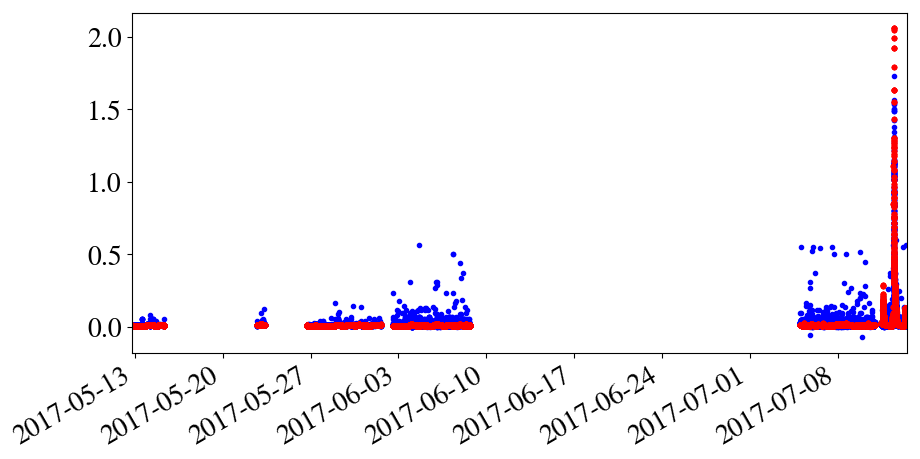

In [333]:
cols = ["value", "diff1", "sum1"]
model = GradientBoostingRegressor(random_state=123).fit(cleaned_final_comparison[cols], cleaned_final_comparison.value_dustrack.values.reshape(-1,1))
print "training accuracy " + str(model.score(cleaned_final_comparison[cols], cleaned_final_comparison.value_dustrack.values.reshape(-1,1)))
print "testing accuracy " + str(model.score(final_comparison[cols], final_comparison.value_dustrack.values.reshape(-1,1)))
cleaned_final_comparison["gradient_predict"] = model.predict(cleaned_final_comparison[cols])
cleaned_final_comparison["gradient_predict"].plot(style='.', c='b')
cleaned_final_comparison["value_dustrack"].plot(style='.', c='r')

In [301]:
# resample to hourly

cleaned_final_comparison_hourly = cleaned_final_comparison.resample('H').mean().dropna()
final_comparison_hourly = final_comparison.resample('H').mean().dropna()

In [300]:
final_comparison_hourly.dropna()

,value,value_dustrack,diff1,gradient_predict,Box_ID
2017-05-12 17:00:00,0.000433,0.005733,2.666667e-04,0.007335,0.000000
2017-05-12 18:00:00,0.499250,0.001617,-1.480297e-17,0.007957,0.000000
2017-05-12 19:00:00,0.000017,0.001883,0.000000e+00,0.005910,0.000000
2017-05-12 20:00:00,0.000033,0.002000,0.000000e+00,0.005959,0.000000
2017-05-12 21:00:00,0.000017,0.002350,0.000000e+00,0.005910,0.000000
2017-05-12 22:00:00,0.513817,0.003417,-3.333333e-05,0.010894,0.000000
2017-05-12 23:00:00,0.006917,0.004067,3.333333e-05,0.008626,0.000000
...,...,...,...,...,...
2017-07-13 06:00:00,3.998279,0.005334,1.838440e-04,0.019880,3.506964
2017-07-13 07:00:00,2.515549,0.005184,0.000000e+00,0.015389,3.501393


training accuracy 0.990491401252
testing accuracy -0.0924648000595


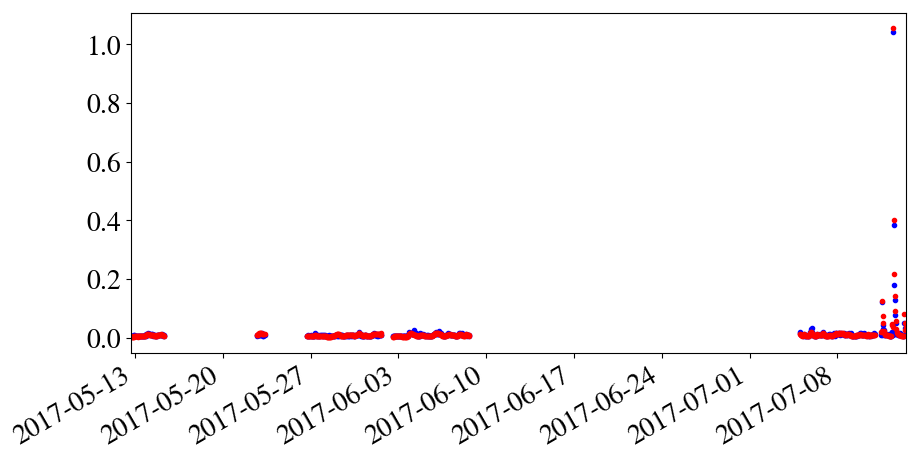

In [302]:
cols = ["value", "diff1"]
model = GradientBoostingRegressor(random_state=123).fit(cleaned_final_comparison_hourly[cols], cleaned_final_comparison_hourly.value_dustrack.values.reshape(-1,1))
print "training accuracy " + str(model.score(cleaned_final_comparison_hourly[cols], cleaned_final_comparison_hourly.value_dustrack.values.reshape(-1,1)))
print "testing accuracy " + str(model.score(final_comparison_hourly[cols], final_comparison_hourly.value_dustrack.values.reshape(-1,1)))
cleaned_final_comparison_hourly["gradient_predict"] = model.predict(cleaned_final_comparison_hourly[cols])
cleaned_final_comparison_hourly["gradient_predict"].plot(style='.', c='b')
cleaned_final_comparison_hourly["value_dustrack"].plot(style='.', c='r')

training accuracy 0.0425655850288
testing accuracy -227.855784272


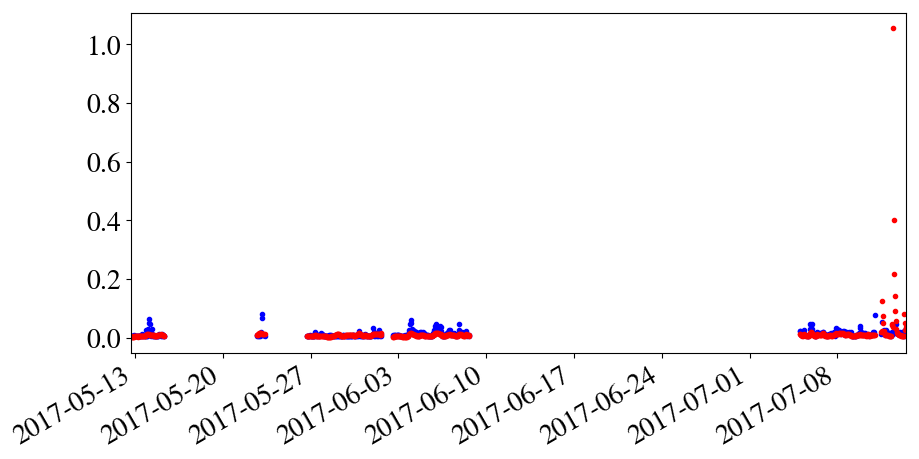

In [305]:
cols = ["value", "diff1"]
model = LinearRegression().fit(cleaned_final_comparison_hourly.value.values.reshape(-1,1), cleaned_final_comparison_hourly.value_dustrack.values.reshape(-1,1))
print "training accuracy " + str(model.score(cleaned_final_comparison_hourly.value.values.reshape(-1,1), cleaned_final_comparison_hourly.value_dustrack.values.reshape(-1,1)))
print "testing accuracy " + str(model.score(final_comparison_hourly.value.values.reshape(-1,1), final_comparison_hourly.value_dustrack.values.reshape(-1,1)))
cleaned_final_comparison_hourly["linear_predict"] = model.predict(cleaned_final_comparison_hourly.value.values.reshape(-1,1))
cleaned_final_comparison_hourly["linear_predict"].plot(style='.', c='b')
cleaned_final_comparison_hourly["value_dustrack"].plot(style='.', c='r')

In [317]:
# resample to every 3 minutes

cleaned_final_comparison_3M = cleaned_final_comparison.resample('3Min').mean().dropna()
final_comparison_3M = final_comparison.resample('3Min').mean().dropna()
cleaned_final_comparison_3M["diff"] = cleaned_final_comparison_3M.value - cleaned_final_comparison_3M.value.shift(-1)
cleaned_final_comparison_3M = cleaned_final_comparison_3M.fillna(0)
final_comparison_3M["diff"] = final_comparison_3M.value - final_comparison_3M.value.shift(-1)
final_comparison_3M = final_comparison_3M.fillna(0)

In [318]:
cleaned_final_comparison_3M

,value,value_dustrack,diff1,gradient_predict,Box_ID,diff
2017-05-12 17:30:00,0.000000,0.011500,0.000000,0.006346,0.000000,-0.000333
2017-05-12 17:33:00,0.000333,0.012667,-0.000333,0.007297,0.000000,-0.000333
2017-05-12 17:36:00,0.000667,0.010000,0.000333,0.008248,0.000000,0.000000
2017-05-12 17:39:00,0.000667,0.007000,0.000000,0.008248,0.000000,0.000667
2017-05-12 17:42:00,0.000000,0.005333,0.000000,0.006346,0.000000,0.000000
2017-05-12 17:45:00,0.000000,0.004000,0.000000,0.006346,0.000000,0.000000
2017-05-12 17:48:00,0.000000,0.003667,0.000000,0.006346,0.000000,0.000000
...,...,...,...,...,...,...
2017-07-13 11:42:00,0.055400,0.052267,-0.000200,0.017742,3.800000,-0.017733
2017-07-13 11:45:00,0.073133,0.048733,0.000200,0.017889,3.733333,0.069348


training accuracy 0.681715050865
testing accuracy -1.30037425217


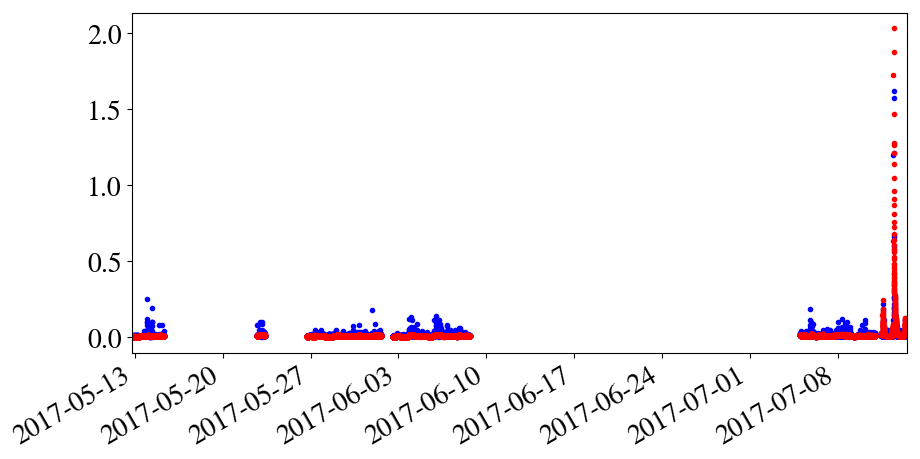

In [319]:
cols = ["value", "diff1"]
model = GradientBoostingRegressor(random_state=123).fit(cleaned_final_comparison_3M[cols], cleaned_final_comparison_3M.value_dustrack.values.reshape(-1,1))
print "training accuracy " + str(model.score(cleaned_final_comparison_3M[cols], cleaned_final_comparison_3M.value_dustrack.values.reshape(-1,1)))
print "testing accuracy " + str(model.score(final_comparison_3M[cols], final_comparison_3M.value_dustrack.values.reshape(-1,1)))
cleaned_final_comparison_3M["gradient_predict"] = model.predict(cleaned_final_comparison_3M[cols])
cleaned_final_comparison_3M["gradient_predict"].plot(style='.', c='b')
cleaned_final_comparison_3M["value_dustrack"].plot(style='.', c='r')

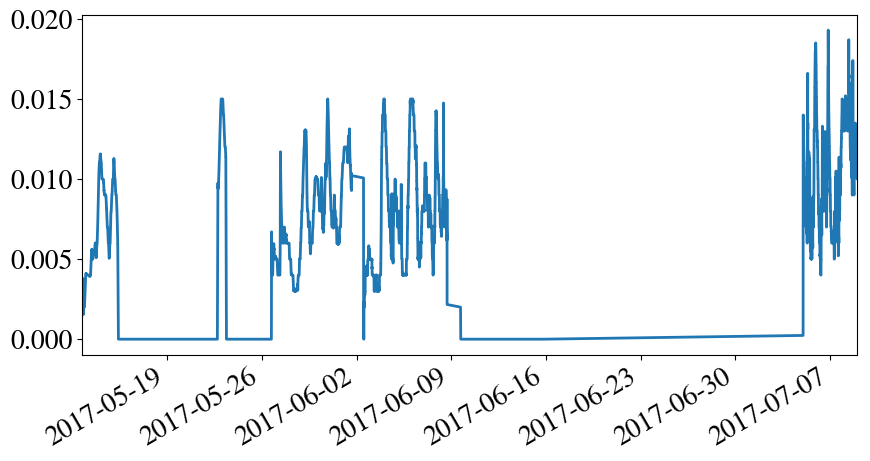

In [330]:
final_comparison.value_dustrack.rolling(60).mean()[:"2017-07-08"].plot()

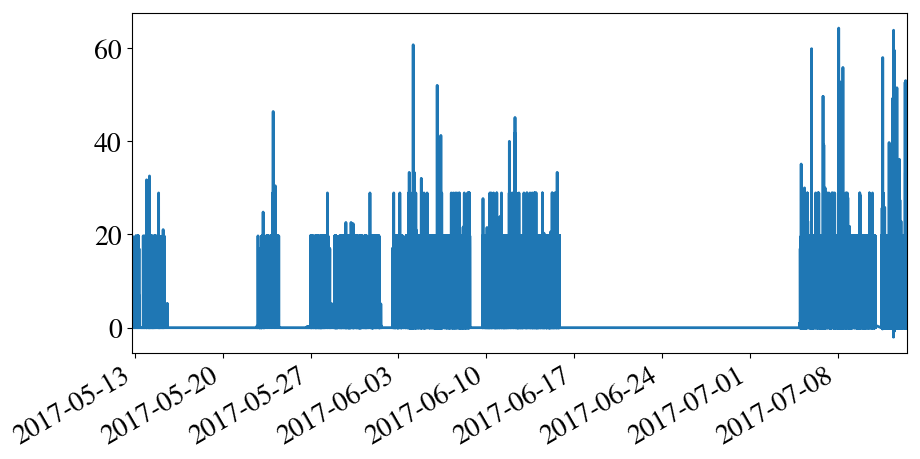

In [343]:
(final_comparison["value"] - final_comparison["value_dustrack"]).plot()

In [344]:
deviation = final_comparison["value"] - final_comparison["value_dustrack"]

In [346]:
scaling = final_comparison["value"] / final_comparison["value_dustrack"]

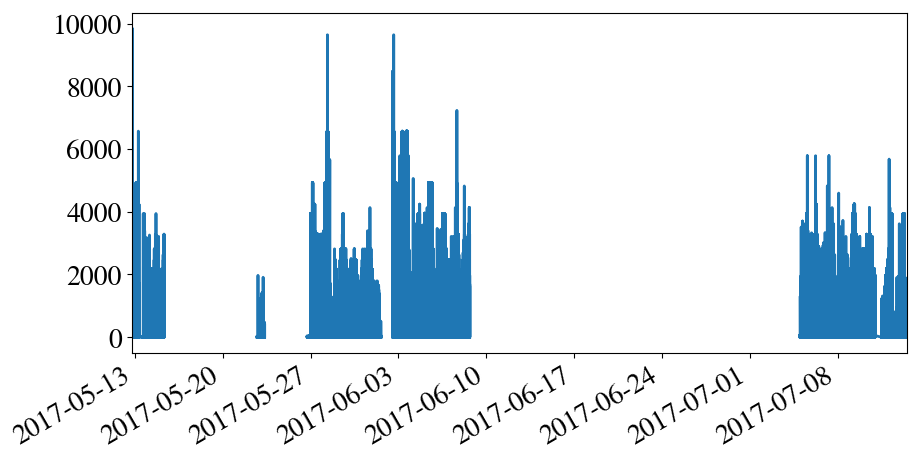

In [347]:
scaling.plot()

In [13]:
final_comparison["deviation"] = final_comparison["value"] - final_comparison["value_dustrack"]

In [19]:
final_comparison["value"] / final_comparison["value_dustrack"]

2017-05-12 17:30:00           NaN
2017-05-12 17:31:00      0.000000
2017-05-12 17:32:00      0.000000
2017-05-12 17:33:00      0.000000
2017-05-12 17:34:00      0.000000
2017-05-12 17:35:00      0.083333
2017-05-12 17:36:00      0.111111
                          ...    
2017-07-13 11:59:00     13.128205
2017-07-13 12:00:00    547.555556
2017-07-13 12:00:00      0.055556
2017-07-13 12:00:00      0.111111
2017-07-13 12:00:00    547.555556
2017-07-13 12:00:00      0.027778
2017-07-13 12:00:00      0.055556
dtype: float64

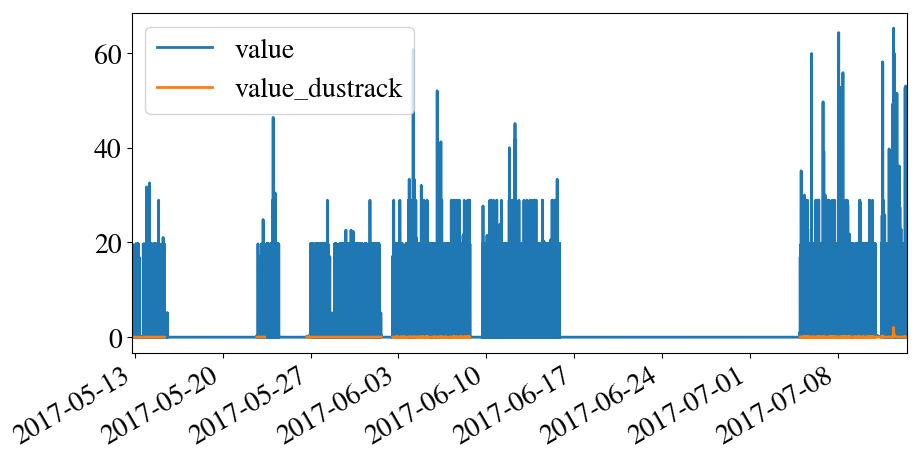

In [18]:
final_comparison[["value", "value_dustrack"]].plot()

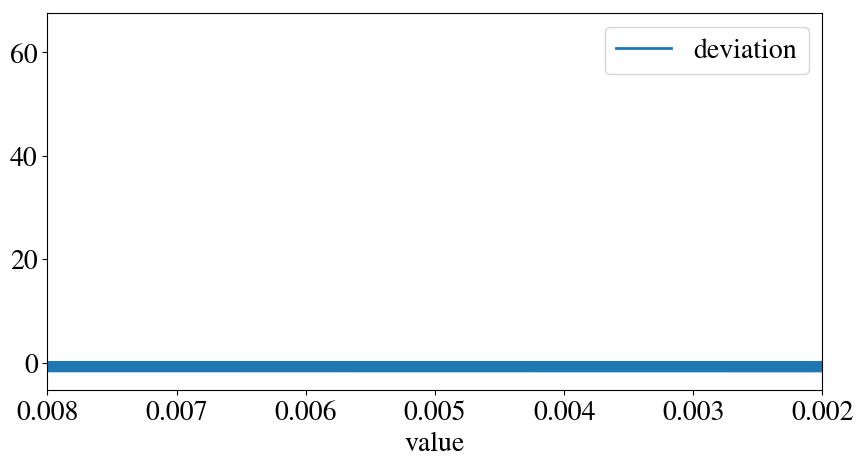

In [16]:
final_comparison[["value", "deviation"]].plot(x = 'value', y = 'deviation')

training accuracy 0.999945054646
testing accuracy 0.999936862733


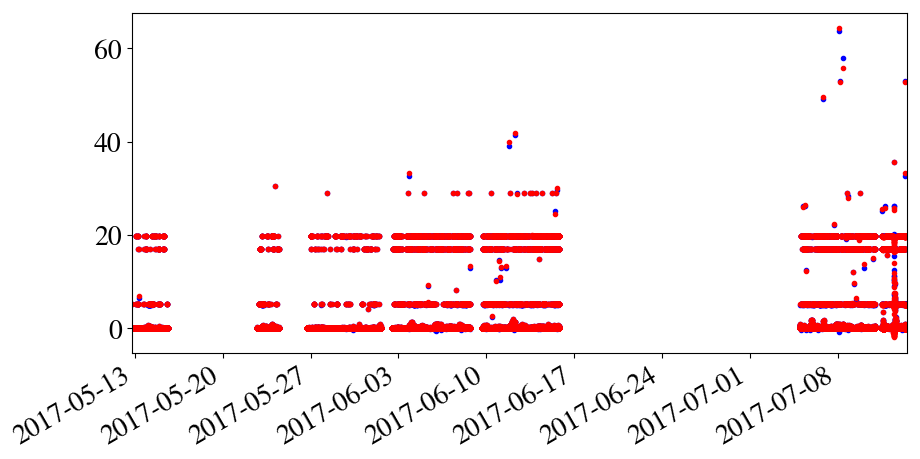

In [353]:
cols = ["value", "diff1"]

train, test = train_test_split(final_comparison[cols + ["deviation", "value_dustrack"]])

model = GradientBoostingRegressor(random_state=123).fit(train[cols], train.deviation.values.reshape(-1,1))
print "training accuracy " + str(model.score(train[cols], train.deviation.values.reshape(-1,1)))
print "testing accuracy " + str(model.score(test[cols],test.deviation.values.reshape(-1,1)))                                                
test["gradient_predict"] = model.predict(test[cols])
test["gradient_predict"].plot(style='.', c='b')
test["deviation"].plot(style='.', c='r')

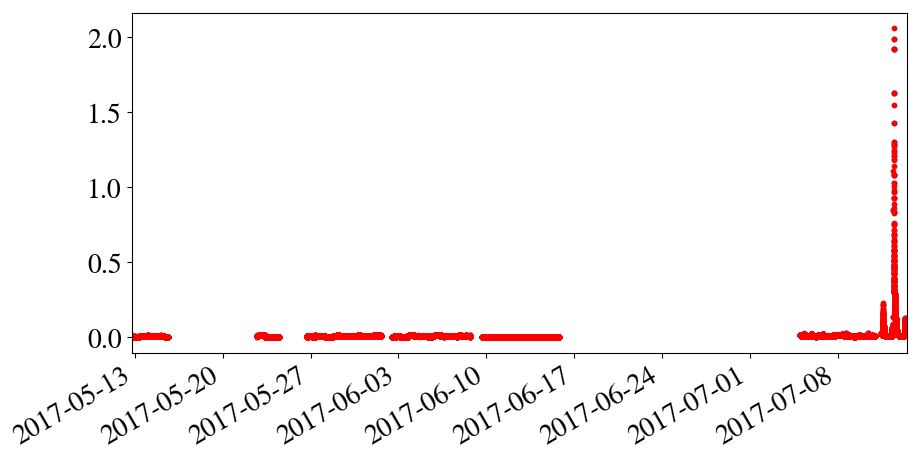

In [354]:
(test["value"] - test["deviation"]).plot(style='.')
test["value_dustrack"].plot(style='.', c='r')

training accuracy 0.999889224239
testing accuracy 0.999909132646


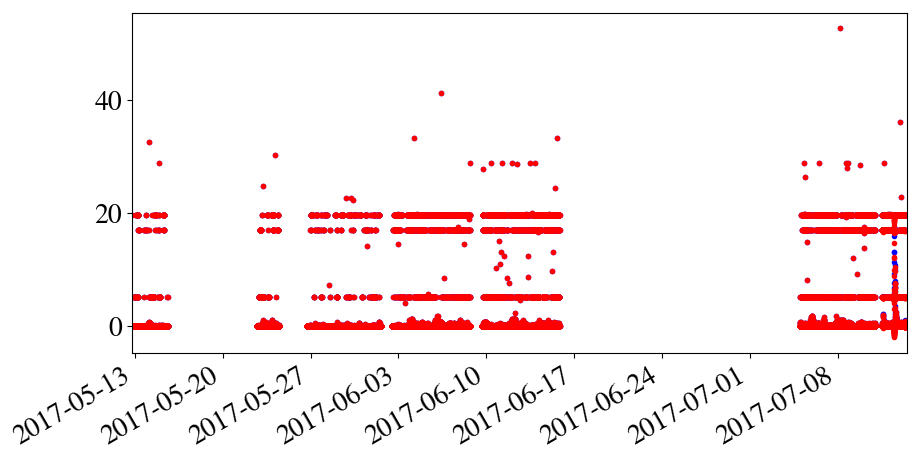

In [362]:
cols = ["value", "diff1"]

train, test = train_test_split(final_comparison[cols + ["deviation", "value_dustrack"]])

model = LinearRegression().fit(train.value.values.reshape(-1,1), train.deviation.values.reshape(-1,1))
print "training accuracy " + str(model.score(train.value.values.reshape(-1,1), train.deviation.values.reshape(-1,1)))
print "testing accuracy " + str(model.score(test.value.values.reshape(-1,1),test.deviation.values.reshape(-1,1)))                                                
test["gradient_predict"] = model.predict(test.value.values.reshape(-1,1))
test["gradient_predict"].plot(style='.', c='b')
test["deviation"].plot(style='.', c='r')

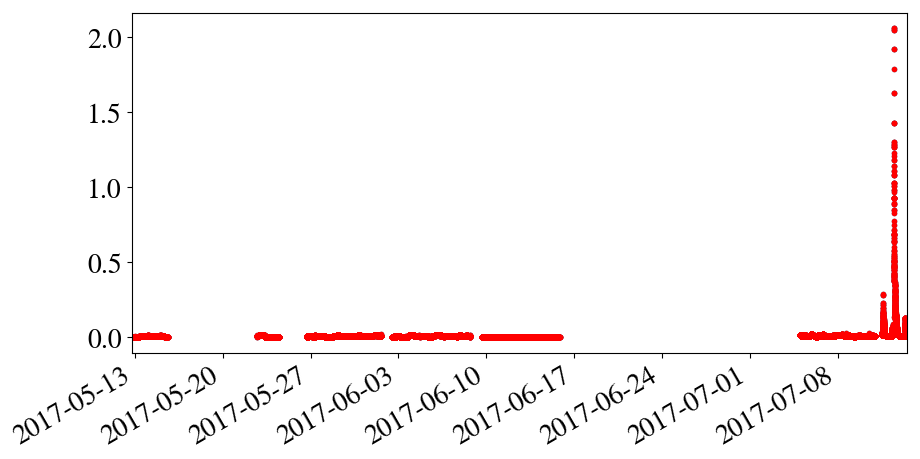

In [363]:
(test["value"] - test["deviation"]).plot(style='.')
test["value_dustrack"].plot(style='.', c='r')